<a id='top'></a>
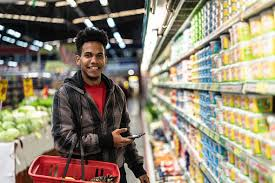

# Customer Supermarket Case Study

**Sorrenti Marco, Simone Baccile, Lorenzo Simone**

**Università di Pisa**

In this notebook, we will try to understand **attributes** and **properties** of the customer_supermarket.csv dataset.

## Contents
1. [Dataset Description](#dataset) 
    1. [Load dataset](#ld)
    2. [Description](#d)
2. [Data Cleaning](#cleaning) 
    1. [Outliers](#ou)
    2. [Missing values](#mv)
3. [Feature Engineering](#feature)
    1. [Mandatory](#mf)
    2. [Others](#nf)
4. [Data Preparation](#preparation)
    1. [Feature correlation](#fc)

<a id='dataset'></a>
## 1. Dataset description ([to top](#top))
As first step of our project we load the whole dataset and make confidence with its features...

<a id='ld'></a>
### 1.A Load dataset ([to top](#top))
Load the dataset

Let's import some useful packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

%matplotlib inline

In [2]:
df = pd.read_csv("data/customer_supermarket.csv", sep='\t', decimal=',')

<a id='d'></a>
### 1.B Description ([to top](#top))

In [3]:
df.head(10)

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,0,536365,01/12/10 08:26,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,2,536365,01/12/10 08:26,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,3,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
5,5,536365,01/12/10 08:26,7.65,17850.0,United Kingdom,22752,SET 7 BABUSHKA NESTING BOXES,2
6,6,536365,01/12/10 08:26,4.25,17850.0,United Kingdom,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6
7,7,536366,01/12/10 08:28,1.85,17850.0,United Kingdom,22633,HAND WARMER UNION JACK,6
8,8,536366,01/12/10 08:28,1.85,17850.0,United Kingdom,22632,HAND WARMER RED POLKA DOT,6
9,9,536368,01/12/10 08:34,4.25,13047.0,United Kingdom,22960,JAM MAKING SET WITH JARS,6


In [4]:
df.tail(10)

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
471900,541900,581587,09/12/11 12:50,3.75,12680.0,France,22730,ALARM CLOCK BAKELIKE IVORY,4
471901,541901,581587,09/12/11 12:50,1.95,12680.0,France,22367,CHILDRENS APRON SPACEBOY DESIGN,8
471902,541902,581587,09/12/11 12:50,1.95,12680.0,France,22629,SPACEBOY LUNCH BOX,12
471903,541903,581587,09/12/11 12:50,4.15,12680.0,France,23256,CHILDRENS CUTLERY SPACEBOY,4
471904,541904,581587,09/12/11 12:50,0.85,12680.0,France,22613,PACK OF 20 SPACEBOY NAPKINS,12
471905,541905,581587,09/12/11 12:50,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,541906,581587,09/12/11 12:50,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,541907,581587,09/12/11 12:50,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,541908,581587,09/12/11 12:50,4.95,12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3
471909,541909,581587,09/12/11 12:50,18.00,12680.0,France,POST,POSTAGE,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471910 entries, 0 to 471909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       471910 non-null  int64  
 1   BasketID         471910 non-null  object 
 2   BasketDate       471910 non-null  object 
 3   Sale             471910 non-null  float64
 4   CustomerID       406830 non-null  object 
 5   CustomerCountry  471910 non-null  object 
 6   ProdID           471910 non-null  object 
 7   ProdDescr        471157 non-null  object 
 8   Qta              471910 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 32.4+ MB


In [6]:
df.dtypes

Unnamed: 0           int64
BasketID            object
BasketDate          object
Sale               float64
CustomerID          object
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,Sale,Qta
count,471910.000000,471910.000000,471910.000000
mean,274019.325265,4.030945,10.716533
std,154859.591780,83.769380,231.355136
min,0.000000,-11062.060000,-80995.000000
25%,140934.250000,1.250000,1.000000
50%,276740.500000,2.080000,4.000000
75%,407825.750000,3.750000,12.000000
max,541909.000000,38970.000000,80995.000000


There are possible outliers in Sale and Qta.

In [8]:
pd.DataFrame([{'Customers': len(df['CustomerID'].value_counts()),
               'Countries': len(df['CustomerCountry'].value_counts()),
               'Baskets': len(df['BasketID'].value_counts()),
               'Products': len(df['ProdID'].value_counts()),              
              }], columns = ['Customers', 'Countries', 'Baskets', 'Products'], index = ['Quantity'])

,Customers,Countries,Baskets,Products
Quantity,4372,38,24627,3953


In [9]:
df.isnull().sum()

Unnamed: 0             0
BasketID               0
BasketDate             0
Sale                   0
CustomerID         65080
CustomerCountry        0
ProdID                 0
ProdDescr            753
Qta                    0
dtype: int64

This dataset is made up by 471910 records (rows) and 9 variables (columns).
As first check, we can see that there are some missing values:
- ``CustomerID``: 65080 missing values.
- ``ProdDescr``: 753 missing values.

Let's now descript each variable.

- ``Unnamed: 0`` is the index column (it could be dropped).
- ``BasketID`` is the index of the basket (we should reset index).
- ``BasketDate`` represent the purchasing date.
- ``Sale`` is the selling price of the single bought product.
- ``CustomerID`` is the user id (we should reset index).
- ``CustomerCountry`` is the user country.
- ``ProdID`` is the id of the products.
- ``ProdDescr`` is the description of each bought product.
- ``Qta`` is the number of each bought product.

<a id='cleaning'></a>
## 2. Data Cleaning ([to top](#top))
In this stage, we will clean our data by handling missing information, outliers.

We drop the ``Unnamed: 0`` attribute, because it is not useful.

In [10]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
df.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


<a id='ou'></a>
### 2.A Outliers ([to top](#top))

Boxplot

<AxesSubplot:>

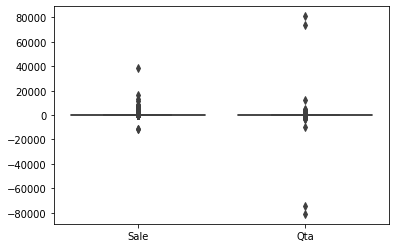

In [12]:
sns.boxplot(data=df[['Sale', 'Qta']])

After some data exploration we drop record with Qta greater or equal than 3500 and with negative values.

In [13]:
df.drop(df[df['Qta']>=2000].index, axis=0, inplace=True)
df.drop(df[df['Qta']<=0].index, axis=0, inplace=True)

We try to drop rows with Sale greater than 3000 and less than 0.

In [14]:
df.drop(df[df['Sale']>=200].index, axis=0, inplace=True)
df.drop(df[df['Sale']<=0].index, axis=0, inplace=True)

<AxesSubplot:>

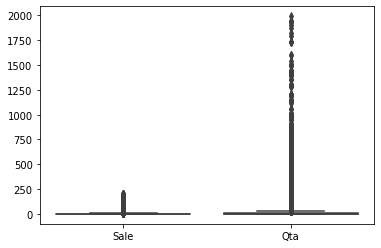

In [15]:
sns.boxplot(data=df[['Sale', 'Qta']])

In order to better understand our dataset we make some semantic adjustments

In [16]:
df = df.rename(columns={'BasketID': 'CartID', 'BasketDate': 'CartDate', 'Sale': 'UnitPrice', 'ProdID': 'ProductID', 'ProdDescr': 'ProductDescription', 'Qta': 'Quantity'})
df.head()

,CartID,CartDate,UnitPrice,CustomerID,CustomerCountry,ProductID,ProductDescription,Quantity
0,536365,01/12/10 08:26,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


Let's now give a better description of each variable.

- ``CartID`` represent the number of each transaction, and it is made up by a 6-digit numeric value. [Categorical] 
- ``CartDate`` represent the purchasing date, made up by date and time in which each transaction has been executed [Categorical] 
- ``UnitPrice`` is the selling price of a single item. [Numerical]
- ``CustomerID`` is the user id, which is made up by a 5-digit numeric value. [Categorical]
- ``CustomerCountry`` is the user country. [Categorical]
- ``ProductID`` is the id of the product, made up by a 5-digit numeric value. [Categorical]
- ``ProductDescription`` is the description of each bought product. [Categorical]
- ``Quantity`` is the number of items bought by a customer for each transaction. [Numerical]

In [17]:
df.describe()

,UnitPrice,Quantity
count,461305.000000,461305.000000
mean,3.187893,11.178409
std,4.990214,35.064293
min,0.001000,1.000000
25%,1.250000,2.000000
50%,2.080000,4.000000
75%,3.750000,12.000000
max,199.890000,1992.000000


<a id='mv'></a>
### 2.B Missing Values ([to top](#top))

In this section we try to handle missing value.

In [18]:
df.isnull().sum()

CartID                    0
CartDate                  0
UnitPrice                 0
CustomerID            63518
CustomerCountry           0
ProductID                 0
ProductDescription        0
Quantity                  0
dtype: int64

Let's manage missing value for CustomerID if possible

In [19]:
df.loc[df['CustomerID'].isnull(), ['CustomerID']]=df[df['CustomerID'].isnull()][['CartID','CustomerID']].apply(lambda x: "G"+x[0], axis=1)

In [20]:
df.isnull().sum()

CartID                0
CartDate              0
UnitPrice             0
CustomerID            0
CustomerCountry       0
ProductID             0
ProductDescription    0
Quantity              0
dtype: int64

Drop AmazonFee, Samples, Debts, POST, DOT

In [21]:
df[(df['ProductID'].str.isnumeric()==False) & (df['ProductID'].str.startswith(('1','2','3','4','5','6','7','8','9','0'))==False)]['ProductID'].unique()

array(['POST', 'C2', 'M', 'BANK CHARGES', 'DCGS0076', 'DOT',
       'gift_0001_40', 'm', 'gift_0001_30', 'gift_0001_20', 'DCGS0069',
       'DCGS0003', 'DCGSSBOY', 'DCGSSGIRL', 'S', 'PADS', 'gift_0001_10',
       'DCGS0004', 'gift_0001_50'], dtype=object)

In [22]:
df.drop(df[df['ProductID']=='DOT'].index, inplace=True)

In [23]:
df.drop(df[df['ProductID']=='M'].index, inplace=True)

In [24]:
df.drop(df[df['ProductID']=='POST'].index, inplace=True)

In [25]:
df.drop(df[df['ProductID']=='S'].index, inplace=True)

In [26]:
df.drop(df[df['ProductID']=='B'].index, inplace=True)

In [27]:
df.drop(df[df['ProductID']=='AMAZONFEE'].index, inplace=True)

In [28]:
df.drop(df[df['ProductID']=='D'].index, inplace=True)

In [29]:
df.drop(df[df['ProductID']=='C2'].index, inplace=True)

In [30]:
df.drop(df[df['ProductID']=='BANK CHARGES'].index, inplace=True)

In [31]:
df.drop(df[df['ProductID']=='m'].index, inplace=True)

In [32]:
df.drop(df[df['ProductID']=='CRUK'].index, inplace=True)

In [33]:
df.drop(df[df['ProductID']=='PADS'].index, inplace=True)

In [34]:
#### to be dropped: 
#df.to_csv('data/clean_df.csv', sep='\t', decimal=',', index=False)

<a id='feature'></a>
## 3. Feature Engineering ([to top](#top))

Splitting Date into several features

In [35]:
df['CartDate'] = pd.to_datetime(df['CartDate'])
df['CartYear']= df['CartDate'].dt.year
df['CartMonth']= df['CartDate'].dt.month
df['CartDay']= df['CartDate'].dt.day
df['CartHour'] = df['CartDate'].dt.hour + df['CartDate'].dt.minute / 60. + df['CartDate'].dt.second / 3600

start = str(df['CartDate'].min()).split(' ')[0]
end = str(df['CartDate'].max()).split(' ')[0]

print('Starting date: {} \t Ending Date: {}'.format(start,end))

dr = pd.date_range(start=start, end=end)
holidays = calendar().holidays(start=dr.min(), end=dr.max())

df['Holiday'] = df['CartDate'].isin(holidays)
df['Holiday'] = pd.to_datetime(df['CartDate']).dt.dayofweek > 4

Starting date: 2010-01-12 	 Ending Date: 2011-12-10


Let's create new attributes

In [36]:
df['Sale'] = df['UnitPrice'] * df['Quantity']

In [37]:
df['TotalCartPrice'] = df.groupby(['CartID'])['Sale'].transform('sum')

In [38]:
df['TotalCartItems'] = df.groupby(['CartID'])['Quantity'].transform('sum')

Product classification based on price [Cheap, Average, Expensive]

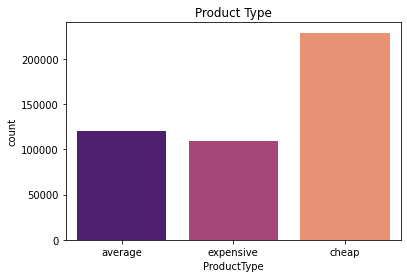

In [39]:
df['ProductType'] = df['UnitPrice'].apply(lambda x: 'cheap' if x<=2 else 'average' if x<=4 else 'expensive')
sns.countplot(x = 'ProductType', data = df, palette = 'magma')
plt.title('Product Type')
plt.show()

In [40]:
#df.to_csv('data/clean_df.csv', sep='\t', decimal=',', index=False)

###### Create Customer Behaviour dataframe

In [41]:
c_df = pd.DataFrame({'CustomerID':df['CustomerID'].unique()})

Country is assigned as the most frequent country

In [42]:
tmp = df.groupby(['CustomerID', 'CustomerCountry'])['CartID'].nunique().reset_index(name='CC')
tmp = tmp.loc[tmp.groupby('CustomerID')['CC'].idxmax()]
c_df['Country'] = c_df.merge(tmp, how='left')['CustomerCountry']

<a id='mf'></a>
### 3.A Mandatory Features ([to top](#top))

In this section we create mandatory features.

**I**: the total number of items purchased by a customer during the period of observation.

In [43]:
tmp = df.groupby(['CustomerID'])['Quantity'].sum().reset_index(name='I')
c_df['I'] = c_df.merge(tmp, how='left')['I']

**Iu**: the number of distinct items bought by a customer in the period of
observation.

In [44]:
tmp = df.groupby(['CustomerID'])['ProductID'].nunique().reset_index(name='Iu')
c_df['Iu'] = c_df.merge(tmp, how='left')['Iu']

**Imax**: the maximum number of items purchased by a customer during a
shopping session

In [45]:
tmp = df.groupby(['CustomerID', 'CartID'])['Quantity'].sum().reset_index(name='Imax')
c_df['Imax'] = c_df.merge(tmp, how='left')['Imax']

**E**: the Shannon entropy on the purchasing behaviour of the customer

The Shannon entropy on the purchasing behaviour of the customer. We split this feature in 2 ways:
1. Shannon entropy of number of product of each Customer's Basket related with total product for each Customer (E1).
2. Shannon entropy of holiday (or not) baskets of each Customer (E2).

In [46]:
# Products bought by Customers
tot_prod = df[df['Quantity']>0].groupby(['CustomerID'])['Quantity'].sum().reset_index()
# Products bought by Customers for each Basket
bask_prod = df[df['Quantity']>0].groupby(['CustomerID', 'CartID'])['Quantity'].sum().reset_index()
r = pd.merge(bask_prod, tot_prod, on=['CustomerID'])
# Compute Shannon Entropy
r['Prob'] = r['Quantity_x']/r['Quantity_y']
r['Entropy'] = -(r['Prob']*np.log2(r['Prob']))
tmp = r.groupby(['CustomerID'])['Entropy'].sum().reset_index(name='E1')
c_df['E1'] = c_df.merge(tmp, how='right')['E1']
c_df['E1'] = c_df['E1'].fillna(0)

In [47]:
# Baskets bought by Customers
tot_bask = df.groupby(['CustomerID'])['CartID'].nunique().reset_index()
# Holiday Baskets bought by Customers
hol_bask = df[df['Holiday']==True].groupby(['CustomerID'])['CartID'].nunique().reset_index()
r = pd.merge(tot_bask, hol_bask, on=['CustomerID'])
# Compute Shannon Entropy
r['Prob_hol'] = r['CartID_y']/r['CartID_x']
r['Prob_week'] = 1-r['Prob_hol']
r['E2'] = -(r['Prob_hol']*np.log2(r['Prob_hol']))-(r['Prob_week']*np.log2(r['Prob_week']))
c_df['E2'] = c_df.merge(r, how='right')['E2']
c_df['E2'] = c_df['E2'].fillna(0)

/opt/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
c_df.head()

,CustomerID,Country,I,Iu,Imax,E1,E2
0,17850.0,United Kingdom,1733,21,40,2.668814,0.811278
1,13047.0,United Kingdom,1390,105,12,1.663235,0.000000
2,12583.0,France,5028,114,12,0.000000,1.000000
3,13748.0,United Kingdom,439,24,88,0.000000,0.468996
4,15100.0,United Kingdom,80,1,88,2.670152,1.000000


<a id='nf'></a>
### 3.B Other new features ([to top](#top))

In this section we try to handle missing value.

##### Total cost of purchased products for each customer

In [49]:
tmp = df.groupby('CustomerID')['Sale'].sum().reset_index(name='TotalCost')
c_df['TotalCost'] = c_df.merge(tmp, how='left')['TotalCost']

##### More expensive product

In [50]:
tmp = df.groupby('CustomerID')['UnitPrice'].max().reset_index(name='Mep')
c_df['Mep'] = c_df.merge(tmp, how='left')['Mep']

##### Less expensive product

In [51]:
tmp = df.groupby('CustomerID')['UnitPrice'].min().reset_index(name='Lep')
c_df['Lep'] = c_df.merge(tmp, how='left')['Lep']

##### Average UnitPrice of purchased products

In [52]:
tmp = df.groupby('CustomerID')['UnitPrice'].mean().reset_index(name='AvgUP')
c_df['AvgUP'] = c_df.merge(tmp, how='left')['AvgUP']

##### Total number of Basket

In [53]:
tmp = df.groupby('CustomerID')['CartID'].nunique().reset_index(name='TotCart')
c_df['TotCart'] = c_df.merge(tmp, how='left')['TotCart']

##### Average monthly Basket

In [54]:
tmp = df.groupby(['CustomerID','CartMonth'])['CartID'].nunique().reset_index(name='TotMonthlyCart')
tmp = tmp.groupby('CustomerID')['TotMonthlyCart'].sum().reset_index(name='AvgCart')
c_df['AvgCart'] = ((c_df.merge(tmp, how='left')['AvgCart'])/12).astype(float)

In [55]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5583 non-null   object 
 1   Country     5583 non-null   object 
 2   I           5583 non-null   int64  
 3   Iu          5583 non-null   int64  
 4   Imax        5583 non-null   int64  
 5   E1          5583 non-null   float64
 6   E2          5583 non-null   float64
 7   TotalCost   5583 non-null   float64
 8   Mep         5583 non-null   float64
 9   Lep         5583 non-null   float64
 10  AvgUP       5583 non-null   float64
 11  TotCart     5583 non-null   int64  
 12  AvgCart     5583 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage: 567.1+ KB


### Customer Behaviour features:
* **CustomerID**
* **Country**: the most frequent country of shopping for each customer.
* **I**: the total number of items purchased by a customer.
* **Iu**: the number of distinct items bought by a customer.
* **Imax**: the maximum number of items purchased by a customer during a shopping session.
* **E1**: Shannon entropy of number of product of each customer's basket related with total product for each customer.
* **E2**: Shannon entropy of holiday (or not) baskets of each customer.
* **Cancelled**: number of cancelled order.
* **TotalCost**: total cost of all basket by a customer.
* **Mep**: most expensive product bought by a customer.
* **Lep**: most expensive product bought by a customer.
* **AvgUP**: average UnitPrice of product bought by a customer.
* **TotCart**: total number of basket for each customer.
* **AvgCart**: average monthly basket bought by a customer.

<a id='preparation'></a>
## 4. Data Preparation ([to top](#top))
Let's prepare data to better understand customer behavior

In [56]:
df = c_df

In [57]:
df.describe()

,I,Iu,Imax,E1,E2,TotalCost,Mep,Lep,AvgUP,TotCart,AvgCart
count,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000
mean,921.735984,59.002149,282.911159,0.932897,0.221205,1639.266357,15.158019,0.877469,3.522972,3.517464,0.293122
std,4173.686485,81.934686,518.245060,1.162732,0.375716,7426.251235,18.528121,3.029015,3.668349,6.858503,0.571542
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.390000,0.060000,0.040000,0.060000,1.000000,0.083333
25%,106.000000,13.000000,72.000000,0.000000,0.000000,223.435000,7.950000,0.290000,2.208947,1.000000,0.083333
50%,279.000000,32.000000,150.000000,0.232009,0.000000,578.900000,12.750000,0.420000,3.014035,2.000000,0.166667
75%,766.000000,77.500000,296.000000,1.626534,0.503258,1387.890000,16.950000,0.850000,4.162873,4.000000,0.333333
max,194444.000000,1785.000000,12572.000000,6.966608,1.000000,274146.020000,195.000000,125.000000,125.000000,206.000000,17.166667


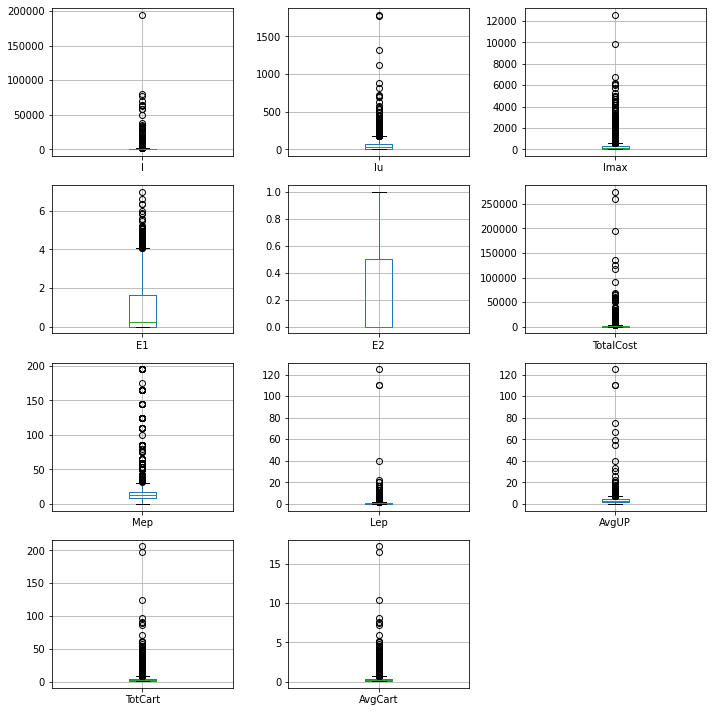

In [58]:
df.plot(kind='box',subplots=True,layout=(4,3),grid=True,figsize=(10,10))
plt.tight_layout()
plt.show()

In [59]:
df.drop(df[df['I']>100000].index, axis=0, inplace=True)
df.drop(df[df['Iu']>1000].index, axis=0, inplace=True)
df.drop(df[df['Imax']>8000].index, axis=0, inplace=True)
df.drop(df[df['TotalCost']>80000].index, axis=0, inplace=True)
df.drop(df[df['Mep']>200].index, axis=0, inplace=True)
df.drop(df[df['Lep']>=30].index, axis=0, inplace=True)

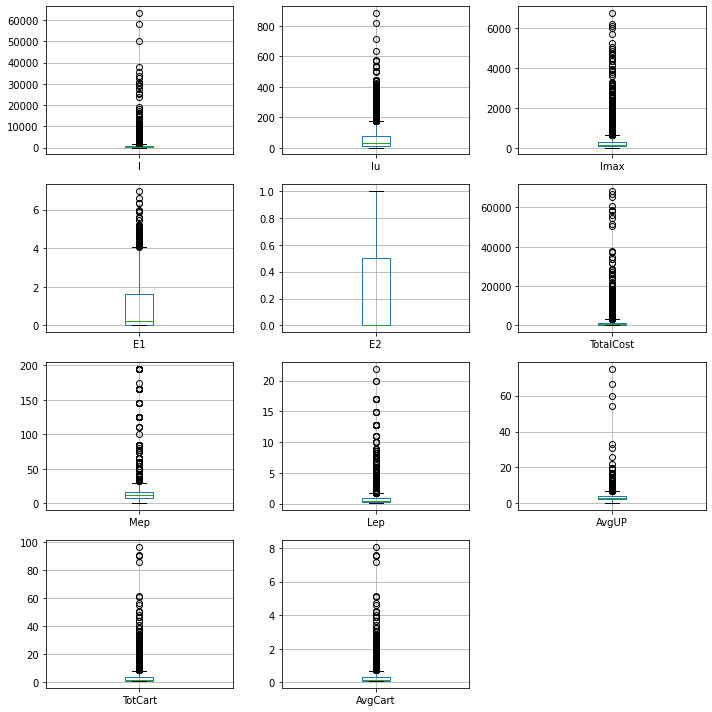

In [60]:
df.plot(kind='box',subplots=True,layout=(4,3),grid=True,figsize=(10,10))
plt.tight_layout()
plt.show()

<a id='fc'></a>
### 4.A Feature correlation ([to top](#top))

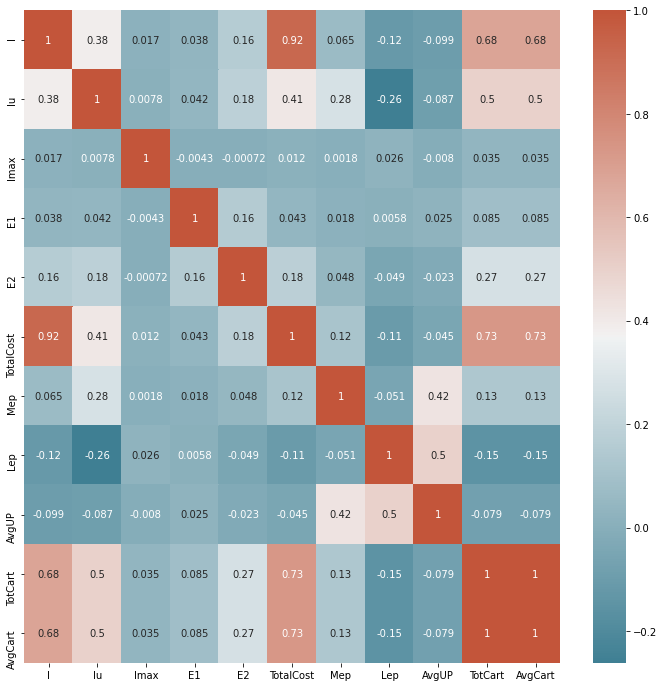

In [61]:
corr = df.corr()
plt.subplots(figsize =(12, 12))
heatmap = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [62]:
# Export dataframe of customer behaviour
#df.to_csv('data/customer_behaviour.csv', sep='\t', decimal=',', index=False)